In [ ]:
#!ipcluster start -n 4 --engines=MPI --profile='mpi' # for parallel run: start the engines using terminal

In [1]:
from ipyparallel import Client
rc=Client(profile='mpi')
view=rc[:]
view.block=True

In [2]:
sync=view.run('test4Class_Filters_Gaussian.py')
sync.display_outputs()

[stdout:0] MPI id=   2 nx=  1024 ny=  1024 nz=  1024
[stdout:1] MPI id=   1 nx=  1024 ny=  1024 nz=  1024
[stdout:2] 
MPI id=   0 nx=  1024 ny=  1024 nz=  1024
Load velocity field cost: 266.70 seconds
3 R-C FFTs cost: 78.18 seconds
Compute E(k) cost: 73.55 seconds
[stdout:3] MPI id=   4 nx=  1024 ny=  1024 nz=  1024
[stdout:4] MPI id=   5 nx=  1024 ny=  1024 nz=  1024
[stdout:5] MPI id=   3 nx=  1024 ny=  1024 nz=  1024
[stdout:6] MPI id=   7 nx=  1024 ny=  1024 nz=  1024
[stdout:7] MPI id=   6 nx=  1024 ny=  1024 nz=  1024


In [6]:
nproc=rc[0].get('nproc')
for i in range(nproc):
    if(rc[i].get('my_id')==0):
        e0=rc[i]
        id_e0=i
        break

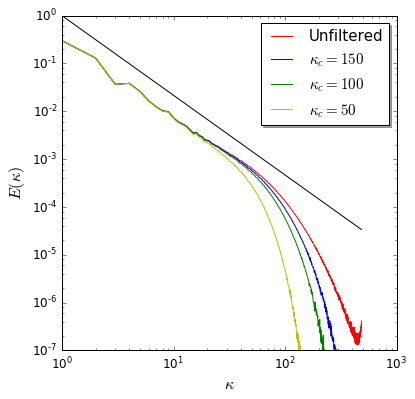

In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#matplotlib.rcParams.update({'font.size': 18})
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
#matplotlib.rc('xlabel', labelsize=20) 
#matplotlib.rc('ylabel', labelsize=20)
#axis_font = {'size':'14'} #{'fontname':'Arial', 'size':'14'}

SIZE = 12
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE+4)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE+4)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE+3)  # legend fontsize
#plt.rc('figure', titlesize=SIZE)  # # size of the figure title


nek=e0.get('nek')
ks=np.linspace(1,nek,nek)
ek_all=e0.get('ek_all')
ek_150=e0.get('ek_150')
ek_100=e0.get('ek_100')
ek_50=e0.get('ek_50')

plt.figure(figsize=(6,6))
plt.loglog(ks,ek_all,'r',label='Unfiltered')
plt.loglog(ks,ek_150,'b',label='$\kappa_c=150$')
plt.loglog(ks,ek_100,'g',label='$\kappa_c=100$')
plt.loglog(ks,ek_50,'y',label='$\kappa_c=50$')
plt.loglog(ks,np.power(ks,-5/3),'k')
plt.xlabel('$\kappa$')
plt.ylabel('$E(\kappa)$')
plt.axis([0.0,1000.0, 1e-7,1.0])
plt.legend(loc=0, shadow=True) #loc='upper center'
ax = plt.gca()
ax.set_autoscale_on(False)
plt.savefig('EnrgySpec_gaussianFilter.eps', format='eps', dpi=1200)